# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [53]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/User/Documents/GitHub/2nd-ML100Days/data'

In [54]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [55]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [59]:
# 觀察相關係數
S = app_train.corr()['TARGET']

In [60]:
from operator import itemgetter

indices, S_sorted = zip(*sorted(enumerate(S), key=itemgetter(1)))
#list(L_sorted)
#list(indices)
for i in range(14):
    print(S.index[indices[i]]," ",S_sorted[i])
    
for i in range(16):
    print(S.index[indices[-i]]," ",S_sorted[-i])    



EXT_SOURCE_3   -0.17891869762805598
EXT_SOURCE_2   -0.1604716716054463
EXT_SOURCE_1   -0.15531712606409276
DAYS_BIRTH   -0.07823930831003195
FLOORSMAX_AVG   -0.044003370532464434
FLOORSMAX_MEDI   -0.043767921047647734
FLOORSMAX_MODE   -0.04322626321389568
AMT_GOODS_PRICE   -0.039645281169414404
REGION_POPULATION_RELATIVE   -0.03722714854256482
ELEVATORS_AVG   -0.034198793675268006
ELEVATORS_MEDI   -0.033862876768524695
FLOORSMIN_AVG   -0.03361350325191881
FLOORSMIN_MEDI   -0.03339428719114784
LIVINGAREA_AVG   -0.03299711746766171
EXT_SOURCE_3   -0.17891869762805598
DAYS_EMPLOYED_ANOM   nan
TARGET   1.0
DAYS_EMPLOYED   0.07495845742555217
REGION_RATING_CLIENT_W_CITY   0.060892667564898695
REGION_RATING_CLIENT   0.058899014945840766
DAYS_LAST_PHONE_CHANGE   0.0552184835135491
DAYS_ID_PUBLISH   0.05145717260719229
REG_CITY_NOT_WORK_CITY   0.050994464367959576
FLAG_EMP_PHONE   0.04598221971656028
REG_CITY_NOT_LIVE_CITY   0.04439537480589986
FLAG_DOCUMENT_3   0.044346346851488506
DAYS_REGIS

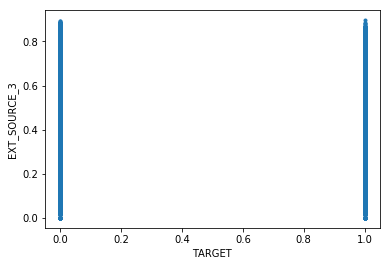

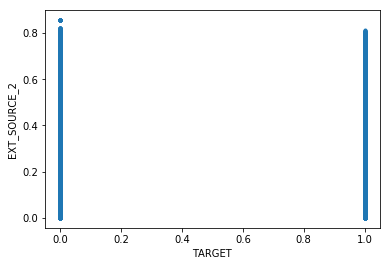

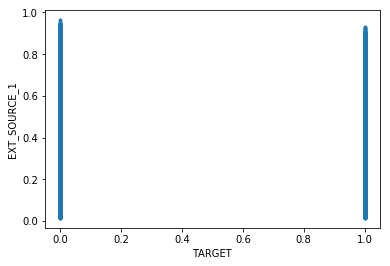

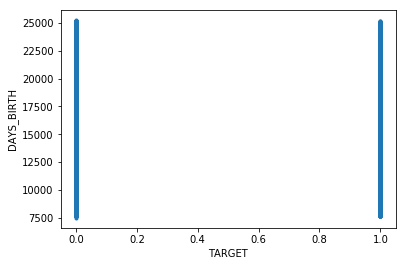

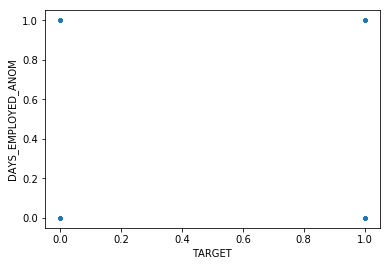

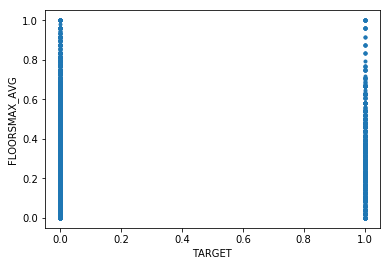

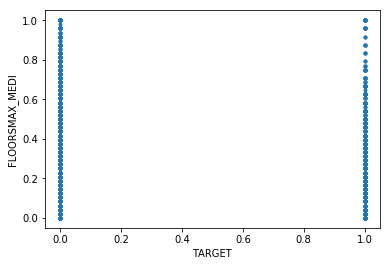

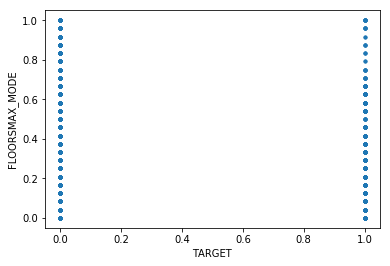

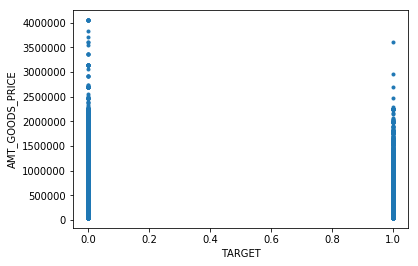

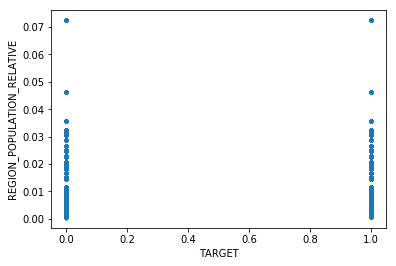

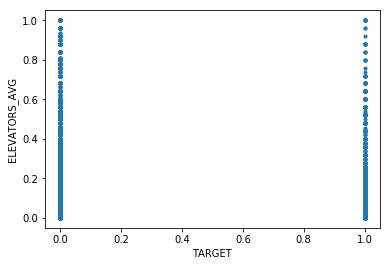

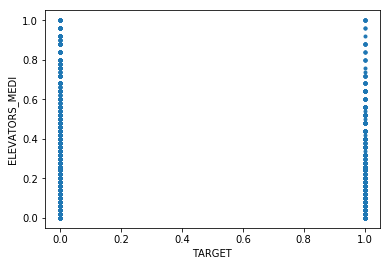

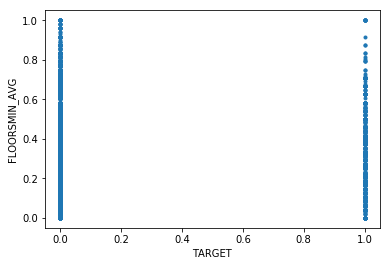

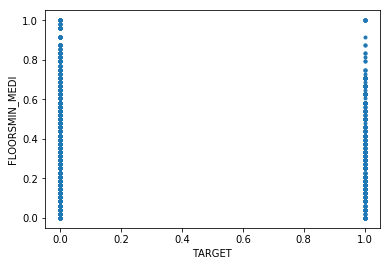

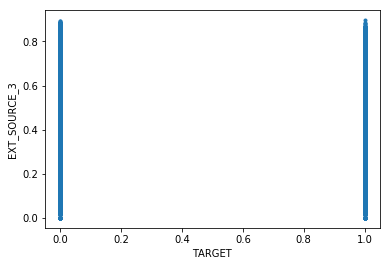

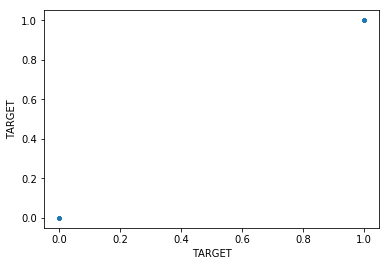

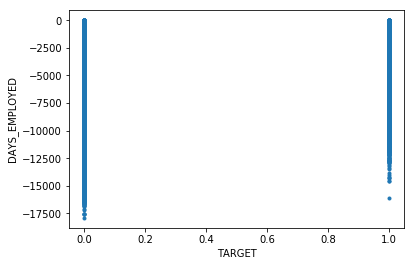

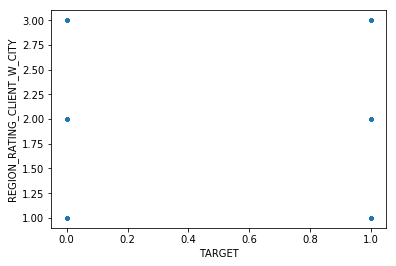

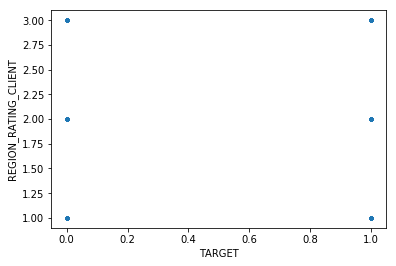

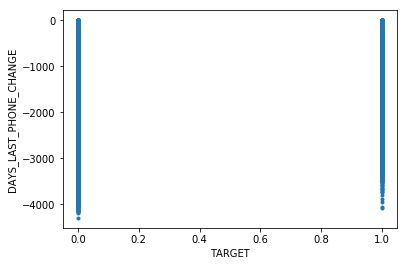

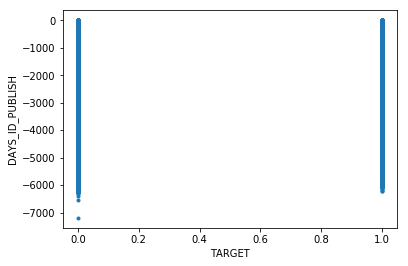

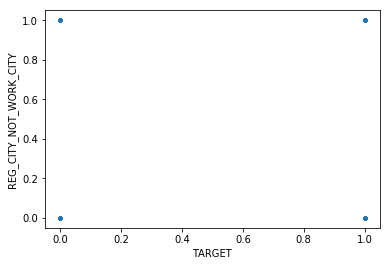

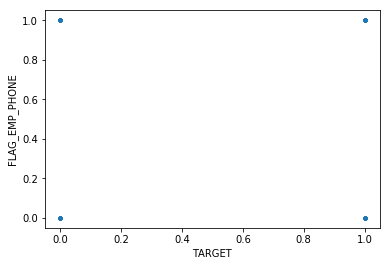

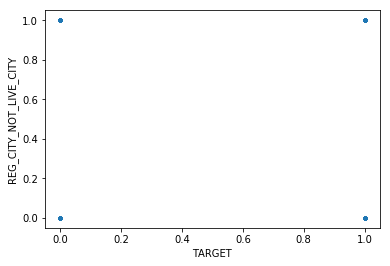

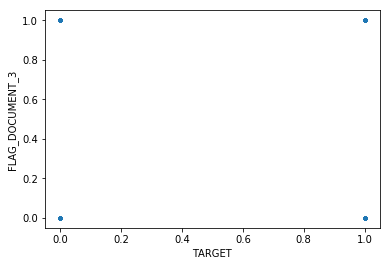

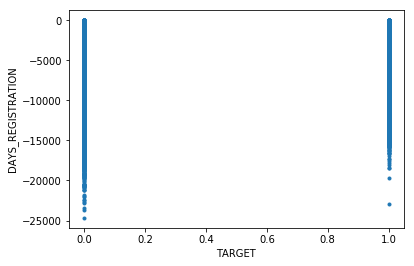

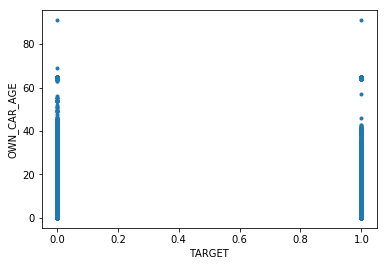

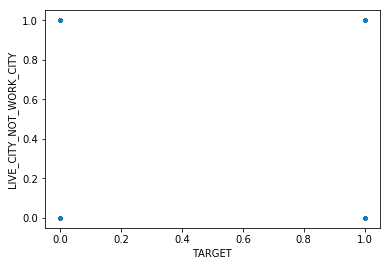

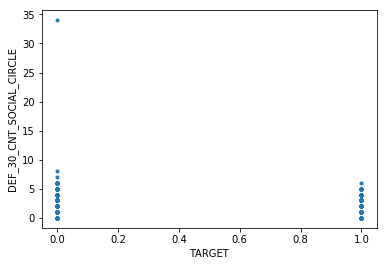

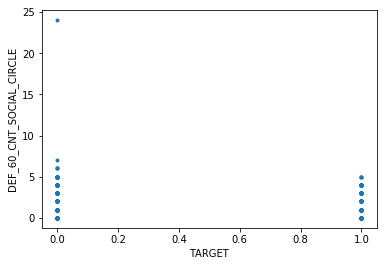

In [52]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態

for i in range(14):
    #print(S.index[indices[i]]," ",S_sorted[i])
    plt.plot(app_train['TARGET'], app_train[S.index[indices[i]]], '.')
    plt.xlabel('TARGET')
    plt.ylabel(S.index[indices[i]])
    plt.show()
    
for i in range(16):
    #print(S.index[indices[i]]," ",S_sorted[i])
    plt.plot(app_train['TARGET'], app_train[S.index[indices[-i]]], '.')
    plt.xlabel('TARGET')
    plt.ylabel(S.index[indices[-i]])
    plt.show()    

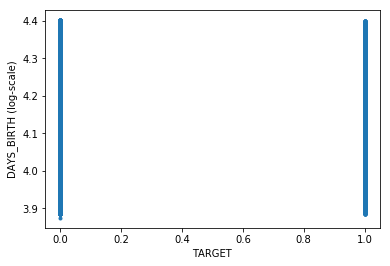

In [63]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(app_train['TARGET'], np.log10(app_train['DAYS_BIRTH']), '.')
plt.xlabel('TARGET')
plt.ylabel('DAYS_BIRTH (log-scale)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


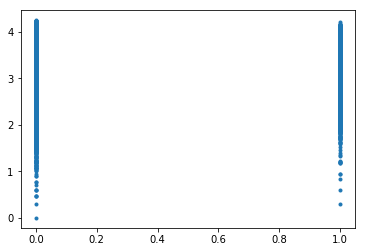

In [67]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(app_train['TARGET'], np.log10(abs(app_train['DAYS_EMPLOYED'])), '.')
#plt.xlabel('TARGET')
#plt.ylabel('DAYS_EMPLOYED (log-scale)')
#plt.show()